### 4.1 누락된 데이터 다루기

In [7]:
import pandas as pd
from io import StringIO

In [48]:
csv_data = '''A,B,C,D
    1.0,2.0,3.0,4.0
    5.0,6.0,,8.0
    10.0,11.0,12.0
    '''

In [49]:
df = pd.read_csv(StringIO(csv_data))

In [50]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [51]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [52]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [53]:
df.dropna(axis=0) 

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [54]:
df.dropna(axis=1) # axis = 1 을 지정해서 NaN이 하나라도 있는 열을 삭제 가능

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [55]:
df.dropna(how='all') # 모든 열이 NaN일때만 행을 삭제, 여기서는 모든

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [56]:
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [57]:
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


보간법으로 누락 값 대체

In [59]:
from sklearn.impute import SimpleImputer

In [61]:
imr = SimpleImputer(missing_values=np.nan, strategy='mean') #axis = 0 는 넣지 않는건가?

In [62]:
imr = imr.fit(df.values)

In [63]:
imputed_data = imr.transform(df.values)

In [64]:
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

##  4.2 범주형 데이터 다루기

In [134]:
df2 = pd.DataFrame([
    ['green', 'M', 10.1, 'class1'],
    ['red','L',13.5,'class2'],
    ['blue','XL',15.3,'class1']
])

In [135]:
df2.columns = ['color','size','price','classlabel']

In [136]:
df2

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [137]:
size_mapping = {'XL':3, 'L':2, 'M':1}

In [138]:
df2['size'] = df2['size'].map(size_mapping)

In [139]:
df2

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


4.2.3 클래스 레이블 인코딩

In [140]:
class_mapping = {label:idx for idx, label in enumerate(np.unique(df2['classlabel']))}

In [141]:
class_mapping

{'class1': 0, 'class2': 1}

In [142]:
df2['classlabel'] = df2['classlabel'].map(class_mapping)

In [143]:
df2

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [144]:
inv_class_mapping = { v : k for k, v in class_mapping.items() } # 거꾸로 클래스 라벨을 돌릴 수 있다.

In [145]:
df2['classlabel'] = df2['classlabel'].map(inv_class_mapping) 

In [146]:
df2

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


Label Encoder 클래스를 사용할 수 있다

In [147]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

In [148]:
class_le = LabelEncoder()

In [149]:
y = class_le.fit_transform(df2['classlabel'].values)

In [150]:
y

array([0, 1, 0])

In [151]:
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

순서 없는 특성에 원-핫 인코딩 적용

In [159]:
X = df2[['color','size','price']].values

In [160]:
df2

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [161]:
X

array([['green', 1, 10.1],
       ['red', 2, 13.5],
       ['blue', 3, 15.3]], dtype=object)

In [153]:
color_le = LabelEncoder()

In [154]:
X[:, 0] = color_le.fit_transform(X[:, 0])

In [155]:
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [156]:
from sklearn.preprocessing import OneHotEncoder

In [128]:
oh_enc = OneHotEncoder(categories='auto')

In [129]:
col_trans = ColumnTransformer([('oh_enc', oh_enc, [0])], remainder = 'passthrough')

In [130]:
col_trans.fit_transform(X)

array([[0.0, 1.0, 0.0, 1, 10.1],
       [0.0, 0.0, 1.0, 2, 13.5],
       [1.0, 0.0, 0.0, 3, 15.3]], dtype=object)

In [133]:
df2

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


# 4.3 데이터셋을 훈련세트와 테스트 셋으로 나누기

In [163]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/' 'machine-learning-databases/wine/wine.data',header=None)

In [166]:
df_wine.columns = ['Class label', 'Alcohol',
                   'Malic acid', 'Ash',
                  'Alcalinity of ash', 'Magnesium',
                  'Total phenols', 'Flavanoids',
                  'Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue', '0D280/0D315 of diluted wines','Proline']

In [167]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,0D280/0D315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [171]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
#stratify에 클래스 배열 y를 전달하면,훈련 세트와 테스트 세트에 있는 클래스 비율이 원본 데이터셋과 동일하게 유지된다.

# 4.4 특성 스케일 맞추기

In [180]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [181]:
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [182]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# 4.5 유용한 특성 선택

In [183]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [188]:
class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
                    train_test_split(X, y, test_size = self.test_size,
                                    random_state = self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r=dim -1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [189]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [190]:
knn = KNeighborsClassifier(n_neighbors=5)

In [191]:
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

In [192]:
k_feat = [len(k) for k in sbs.subsets_]

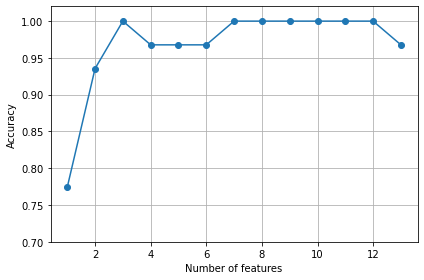

In [197]:
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [200]:
k3 = [sbs.subsets_[10]]

In [201]:
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', '0D280/0D315 of diluted wines'], dtype='object')


C:\Users\qhrrl\anaconda3\lib\site-packages\pandas\core\indexes\base.py:4111: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [202]:
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [203]:
print(knn.score(X_train_std, y_train)) # train set 정확도

0.967741935483871


In [204]:
print(knn.score(X_test_std, y_test)) # test set 정확도

0.9629629629629629


# knn.fit(X_train_std[:, k3], y_train) 이거부터

In [212]:
from sklearn.ensemble import RandomForestClassifier

In [213]:
feat_labels = df_wine.columns[1:]

In [214]:
feat_labels

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       '0D280/0D315 of diluted wines', 'Proline'],
      dtype='object')

In [215]:
forest = RandomForestClassifier(n_estimators = 500, random_state=1)

In [217]:
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [218]:
importances = forest.feature_importances_

In [219]:
indices = np.argsort(importances)[::-1]

In [220]:
indices

array([12,  6,  9, 11,  0, 10,  5,  4,  1,  8,  3,  7,  2], dtype=int64)

In [223]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                           feat_labels[indices[f]],
                           importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) 0D280/0D315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


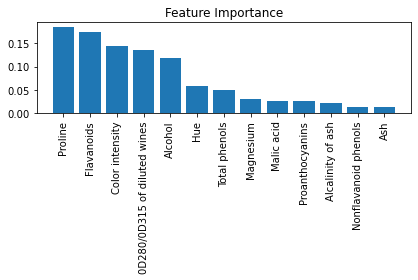

In [225]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
       importances[indices],
       align='center')
plt.xticks(range(X_train.shape[1]),
          feat_labels[indices], rotation = 90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [226]:
from sklearn.feature_selection import SelectFromModel

In [229]:
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)

In [230]:
X_selected = sfm.transform(X_train)

In [231]:
print('이 임계조건을 만족하는 샘플의 수 :',X_selected.shape[1])

이 임계조건을 만족하는 샘플의 수 : 5


In [232]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                           feat_labels[indices[f]],
                           importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) 0D280/0D315 of diluted wines   0.136162
 5) Alcohol                        0.118529
